<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
boston_df=pd.read_csv('boston_housing_data.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

The following describes the dataset variables:

- CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS: proportion of non-retail business acres per town.

- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX: nitric oxides concentration (parts per 10 million)

- RM: average number of rooms per dwelling

- AGE: proportion of owner-occupied units built prior to 1940

- DIS: weighted distances to five Boston employment centres

- RAD: index of accessibility to radial highways

- TAX: full-value property-tax rate per $10,000

- PTRATIO: pupil-teacher ratio by town

- LSTAT: % lower status of the population

- MEDV: Median value of owner-occupied homes in $1000's
occupied homes in $1000's
-occupied homes in $1000's

In [13]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
boston_df.shape

(506, 14)

In [25]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- For the "Median value of owner-occupied homes" provide a boxplot

## Task 2: Generate Descriptive Statistics and Visualizations

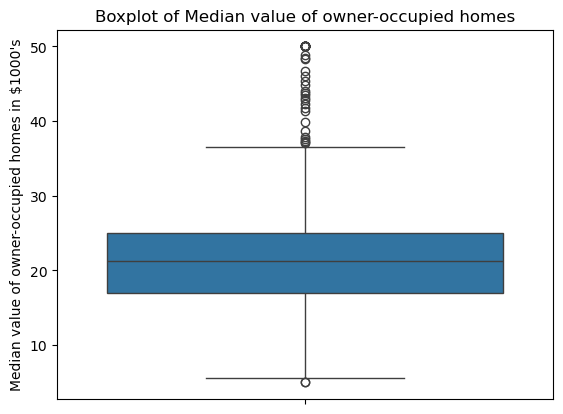

'\n    This boxplot show 50% of the data, which is the height of the box.\n    The line inside the box is the median value of home price\n    The whiskers (T shaped lines) represent the minimum and maximum values\n    Points outside the whiskers are outliers\n\n'

In [69]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.ylabel('Median value of owner-occupied homes in $1000\'s')
pyplot.show()

"""
    This boxplot show 50% of the data, which is the height of the box.
    The line inside the box is the median value of home price
    The whiskers (T shaped lines) represent the minimum and maximum values
    Points outside the whiskers are outliers

"""

- Provide a  bar plot for the Charles river variable

In [37]:
boston_df['CHAS'].value_counts().reset_index()

,CHAS,count
0,0.0,471
1,1.0,35


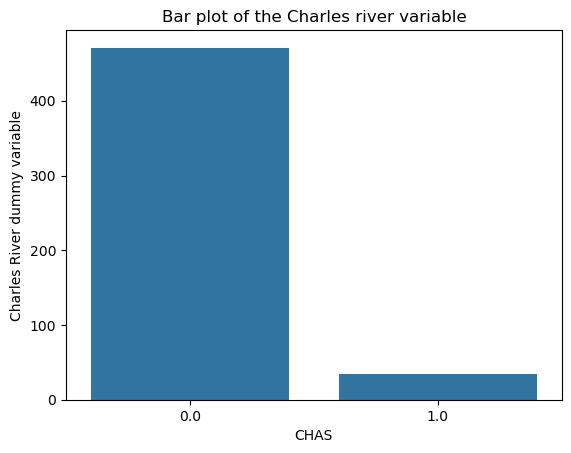

'\n    The bar plot shows the number of homes that are near the Charles river (CHAS = 1) and those that are not (CHAS=0)\n    Each variable was shown seperately\n    The heights of the bars indicates the count of homes\n\n'

In [71]:
ax = sns.barplot(x='CHAS', y='count', data=chas_count)
pyplot.title('Bar plot of the Charles river variable')
pyplot.ylabel('Charles River dummy variable')
pyplot.show()

"""
    The bar plot shows the number of homes that are near the Charles river (CHAS = 1) and those that are not (CHAS=0)
    Each variable was shown seperately
    The heights of the bars indicates the count of homes

"""

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

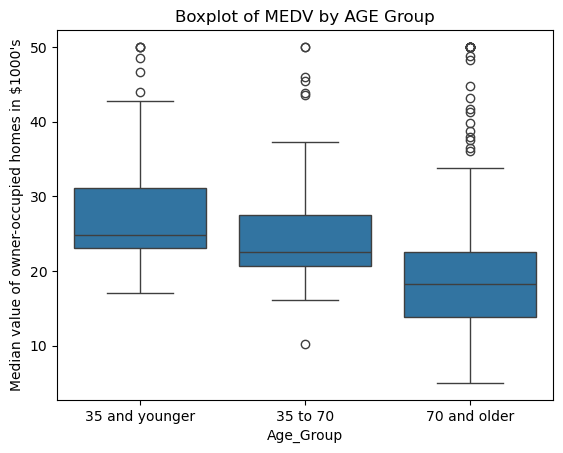

'\n    This boxplot shows the median value of owner-occupied homes (MEDV) in $1000s, \ncategorized by three age groups: “35 and younger,” “35 to 70,” and “70 and older.\n\n    This plot helps compare home values across different age groups, showing trends and variability.\n    For instance, it appears that the median home value tends to decrease with increasing age group,\nand there are more high-value outliers among younger homeowners.\n\n'

In [67]:
# Discretize the 'AGE' column

boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', '35 to 70', '70 and older'])

ax = sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
pyplot.ylabel("Median value of owner-occupied homes in $1000\'s")
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.show()


"""
    This boxplot shows the median value of owner-occupied homes (MEDV) in $1000s, 
categorized by three age groups: “35 and younger,” “35 to 70,” and “70 and older.

    This plot helps compare home values across different age groups, showing trends and variability.
    For instance, it appears that the median home value tends to decrease with increasing age group,
and there are more high-value outliers among younger homeowners.

"""

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

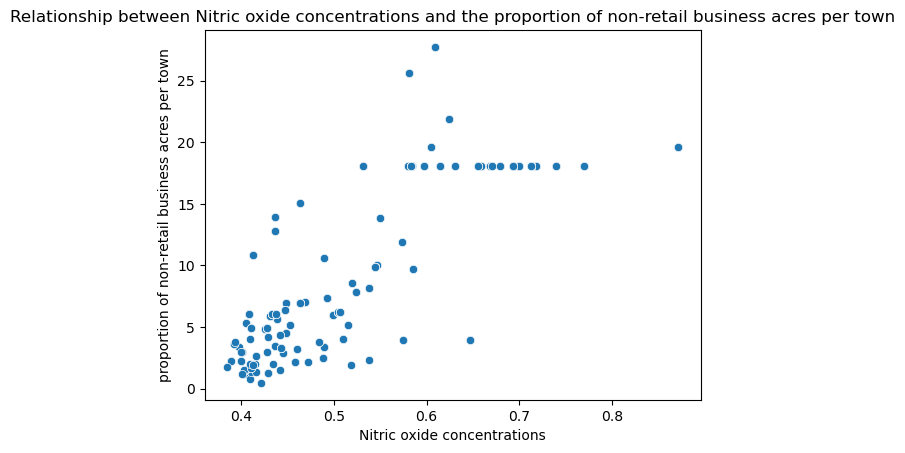

In [43]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('proportion of non-retail business acres per town')
pyplot.show()

"""
    This scatter plot illustrates the relationship between nitric oxide concentrations
and the proportion of non-retail business acres per town

    This plot helps visualize how environmental factors like nitric oxide levels
might be associated with urban development patterns.
    
"""

      Looking at the picture, we can see that these values has a linear relationship as the concentration of Nitric oxide increases, the proportion of non-retail business acres also tends to increase. This means that towns with higher industrial activity, indicated by more non-retail business acres, tend to have higher levels of Nitric oxide pollution. The data points are more densely packed at lower values, indicating that most towns have lower levels of both NOX and INDUS.

- Create a histogram for the pupil to teacher ratio variable

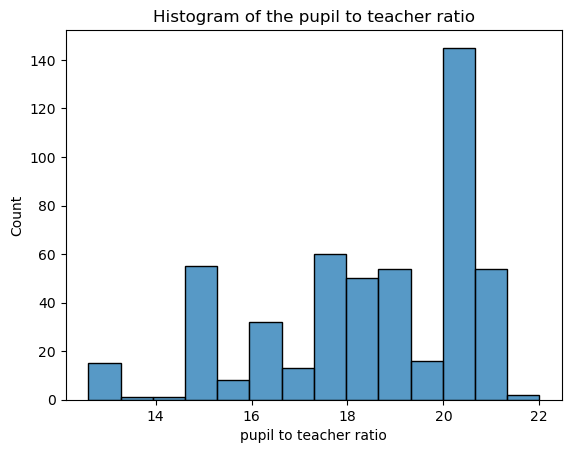

'\n    This histogram shows the distribution of the pupil-to-teacher ratio.\n    \n    The peak around the value 20 suggests that this ratio is the most common in the dataset,\nwith over 140 occurrences.\n\n    This visualization helps understand how pupil-to-teacher ratios are spread across different schools or districts.\n\n'

In [74]:
ax = sns.histplot(boston_df['PTRATIO'])
pyplot.title('Histogram of the pupil to teacher ratio')
pyplot.xlabel('pupil to teacher ratio')
pyplot.show()

"""
    This histogram shows the distribution of the pupil-to-teacher ratio.
    
    The peak around the value 20 suggests that this ratio is the most common in the dataset,
with over 140 occurrences.

    This visualization helps understand how pupil-to-teacher ratios are spread across different schools or districts.

"""

## Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in MEDV of whether having a Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in MEDV of whether having a Charles river or not")

In [194]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                      boston_df[boston_df['CHAS']==1]['MEDV'],
                      equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [220]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['Age_Group'] == '35 to 70']['MEDV'], 
                   boston_df[boston_df['Age_Group'] == '70 and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [228]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == '35 to 70']['MEDV']
seventy_upper = boston_df[boston_df['Age_Group'] == '70 and older']['MEDV']

In [231]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (There is no linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).)
*   $H\_1:$ There is a linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [300]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

**Conclusion**: NO, we can't conclude that there is no significant relationship between NOX and INDUS, as the Pearson correlation coefficient between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS) is approximately 0.798. This indicates a strong positive linear relationship between the two variables. Therefore, we can conclude that there is a significant relationship between NOX and INDUS.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

* $H_0: β1$ = 0 (Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes)
* $H_1: β1$ is not equal to 0 ((Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes)

In [76]:
## insert code here
## create a list of students and evaluation socres
X = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

# R-square is 0.001, R will be √0.001, correlation coefficient is 0.03 (close to 0). There is a very weak correlation between the number of students who participated in the evaluation survey and evaluation scores

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        19:28:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in additional weighted distance to the five Boston employment centres based on the median value of owner occupied homes. The coefficient *1.0916* indicates that the median value of owner-occupied homes (MEDV) is expected to increase by approximately 1.09 units (in the same units as MEDV, which typically represents thousands of dollars).